In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from rflearn.env import WindGridWorld
from rflearn.algo import MCEpsilonSoft
from rflearn.utils import zero_values, random_policy

# Windy Grid World

In [2]:
env = WindGridWorld()
values = zero_values(env)
policy = random_policy(env)

agent = MCEpsilonSoft(env, values, policy)
agent.fit(gamma=1, epsilon=0.1, lam=0.05, kbatch=30, max_steps=None)

<AxesSubplot:>

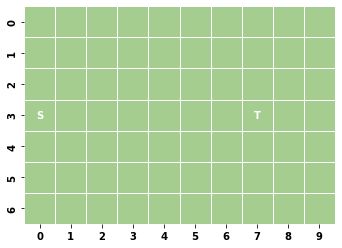

In [3]:
env.plot_grid('st')

In [13]:
agent.transform(1800)

100%|██████████| 1800/1800 [00:34<00:00, 52.13it/s]


<AxesSubplot:>

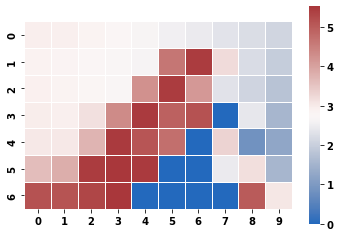

In [14]:
q_vals = pd.Series(agent.qvalue).unstack()[env.A]
pi_vals = pd.DataFrame(agent.policy, index=agent.env.S, columns=agent.env.A)
v_vals = (q_vals * pi_vals).sum(1)
v_vals = np.log(1+-1*v_vals.values.reshape(env.shape))

sns.heatmap(v_vals, linewidths=0.5, cmap='vlag', square=True)

<AxesSubplot:>

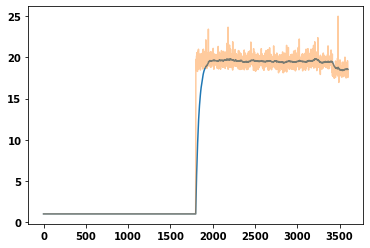

In [15]:
loss = -1 * pd.Series(agent.hist['avg_r'])

loss.ewm(halflife=25).mean().plot()
loss.plot(alpha=0.4)
# plt.axhline(0, linestyle='--', color='grey',linewidth=1)